# Oil Well Production Forecasting using Random Forest
## Overview:
In this project, we aim to forecast oil well production rates using machine learning, specifically focusing on the Random Forest regression model. This project demonstrates the application of data science techniques in the oil and gas industry for optimizing production rates based on well characteristics such as well depth, reservoir pressure, oil density, and temperature.

1. Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


2. Generate Synthetic Data for Oil Well Production
   We’ll simulate data based on well characteristics, including well depth, reservoir pressure, oil density, temperature, and the production rate.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of wells
n_wells = 500

# Generate synthetic features for oil wells
well_depth = np.random.randint(1500, 5000, size=n_wells)  # depth in meters
reservoir_pressure = np.random.uniform(20, 100, size=n_wells)  # pressure in bars
oil_density = np.random.uniform(0.7, 1.2, size=n_wells)  # density in g/cm^3
temperature = np.random.uniform(20, 150, size=n_wells)  # temperature in Celsius
production_rate = (well_depth * 0.02 + reservoir_pressure * 0.5 - oil_density * 50 + temperature * 0.1
                  + np.random.normal(0, 10, n_wells))  # synthetic production rate

# Create a DataFrame
data = pd.DataFrame({
    'Well_Depth': well_depth,
    'Reservoir_Pressure': reservoir_pressure,
    'Oil_Density': oil_density,
    'Temperature': temperature,
    'Production_Rate': production_rate
})

# Display the first few rows of the dataset
print(data.head())


   Well_Depth  Reservoir_Pressure  Oil_Density  Temperature  Production_Rate
0        4674           22.987855     0.993115    37.253048        59.929954
1        2360           85.808045     0.952944    93.780310        69.056123
2        2794           48.815251     1.005727   109.630446        38.674486
3        2630           30.164841     0.709055   124.076271        45.537721
4        2595           61.779461     1.136062    46.019532        32.958200


3. Data Preprocessing and Visualization

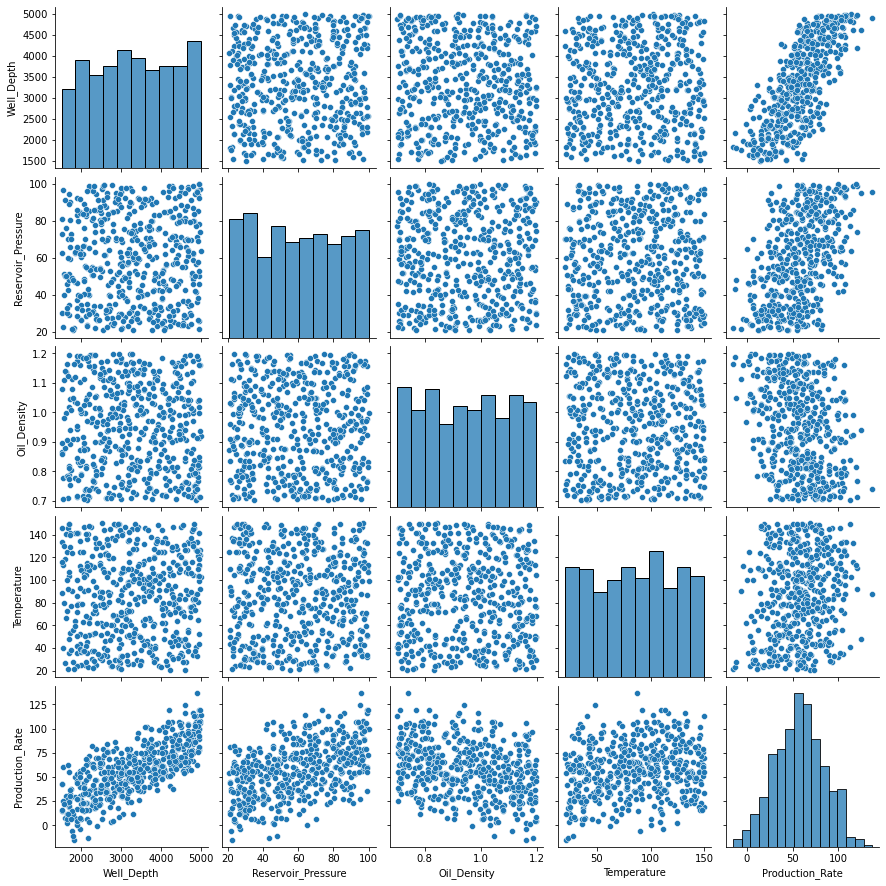

In [3]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Split the data into training and test sets
X = data[['Well_Depth', 'Reservoir_Pressure', 'Oil_Density', 'Temperature']]
y = data['Production_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. Model Development: Random Forest for Regression

Random Forest is widely used in the oil and gas sector for regression tasks due to its flexibility and performance.

In [4]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 145.83987570443185
R-squared: 0.7833259989552214


5. Model Evaluation and Plotting Results

<ipython-input-5-67f7ec7cd286>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')


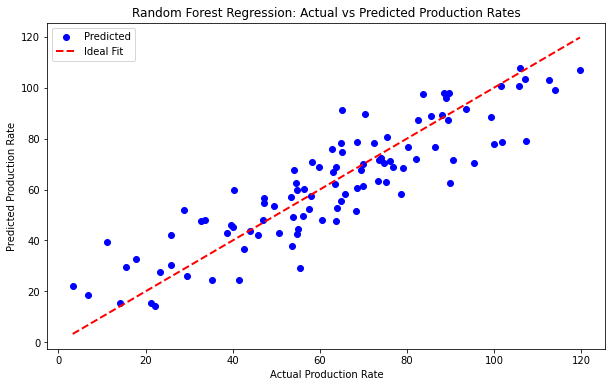

In [5]:
# Plot actual vs predicted production rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')
plt.xlabel('Actual Production Rate')
plt.ylabel('Predicted Production Rate')
plt.title('Random Forest Regression: Actual vs Predicted Production Rates')
plt.legend()
plt.show()


6. Model Optimization (Hyperparameter Tuning)

You can also improve the model performance by tuning hyperparameters using GridSearchCV or RandomizedSearchCV to find the best model settings

In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Randomized search over hyperparameters
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_grid,
                                   n_iter=10, cv=5, verbose=2, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}


## Summary : 

  ### Data:
We generated synthetic data representing various well features:

Well Depth (meters)
Reservoir Pressure (bars)
Oil Density (g/cm³)
Temperature (Celsius)
Production Rate (target variable: barrels per day)
Methodology
Feature Engineering: We created features from the well characteristics and defined the target variable (production rate). Data preprocessing included scaling the features and splitting them into training and test sets.
Modeling: We used Random Forest Regressor to model the relationship between the features and the production rate. Random Forest was chosen for its ability to handle non-linear relationships and avoid overfitting by averaging multiple decision trees.
Hyperparameter Tuning: We conducted a RandomizedSearchCV to find the optimal hyperparameters, tuning over:
Number of estimators (n_estimators)
Maximum features (max_features)
Minimum samples split (min_samples_split)
Maximum depth (max_depth)

### Results:
Best Hyperparameters:
n_estimators: 100
min_samples_split: 2
max_features: 'log2'
max_depth: None
Performance Metrics:
Mean Squared Error (MSE): 145.84
R-squared: 0.783
These metrics indicate that the model explains approximately 78% of the variance in the production rates. The results are promising, but further improvements can be made through advanced feature engineering and trying more sophisticated models.

Next Steps
Advanced Models: Experiment with models like XGBoost, LightGBM, or Gradient Boosting for potentially better performance.
Feature Engineering: Introduce interaction features and transform skewed variables to capture more complex relationships.
Ensemble Techniques: Combine different models to form an ensemble and further reduce prediction errors.

### Conclusion:
This project demonstrates the use of Random Forest regression in forecasting oil production rates, an essential task in optimizing production in the oil and gas industry. By improving the model further, we can achieve more accurate predictions, making this project a valuable asset for decision-making in the sector.

